In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [115]:
def skip_row(n):
    # Generate the list of all numbers from 1 to 71252
    all_numbers = list(range(1, n))  
    # The generated_numbers list from the previous code
    start = 1
    end = n
    batch_size = 100
    interval = 11
    generated_numbers = []

    while start <= end:
        batch = list(range(start, start + batch_size))
        generated_numbers.extend(batch)
        start += batch_size + interval

    # Remove the generated_numbers from the all_numbers list
    for num in generated_numbers:
        all_numbers.remove(num)
    return all_numbers


In [116]:
all_numbers = skip_row(71141)
df = pd.read_csv('BP.csv', skiprows=all_numbers)

#uncomment below for callibration to Newton
# df['Voltage_0'] = (df['Voltage_0'] * 176.8325) - 19.5057

In [117]:
df.shape

(64100, 1)

In [118]:
# Calculate the number of data points for the first 60 seconds (60 seconds * 1000 Hz)
data_points = 60 * 1000

# Extract the first 60 seconds of data
data_subset = df.iloc[:data_points, :]

# Calculate minimum, maximum, and median for both columns
min_vol = np.min(data_subset['Voltage'])
max_vol = np.max(data_subset['Voltage'])
median_vol = np.median(data_subset['Voltage'])

# Print the results
print("Statistics for BP:")
print(f"Minimum: {min_vol}")
print(f"Maximum: {max_vol}")
print(f"Median: {median_vol}\n")

Statistics for BP:
Minimum: 0.0499
Maximum: 3.381061
Median: 2.046656



In [119]:
print(data_subset.shape)
print(df.shape)

(60000, 1)
(64100, 1)


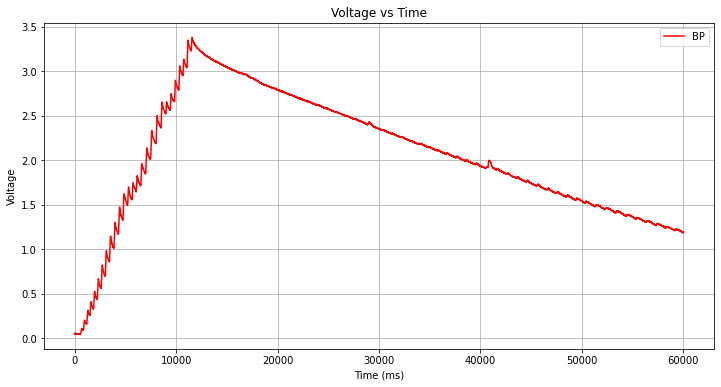

In [120]:
plt.figure(figsize=(12, 6))
plt.plot(data_subset['Voltage'], label='BP', color='red')
plt.title('Voltage vs Time')
plt.xlabel('Time (ms)')
plt.ylabel('Voltage')
plt.legend(loc='best')
plt.grid()
plt.show()

In [121]:
# Calibration values
slope = 64.64
intercept = -32.32

# Function to calculate blood pressure
def calculate_blood_pressure(voltage):
    return slope * voltage + intercept

In [122]:
data_subset.loc[:,'blood_pressure'] = data_subset['Voltage'].apply(calculate_blood_pressure)

In [123]:
data_subset.shape

(60000, 2)

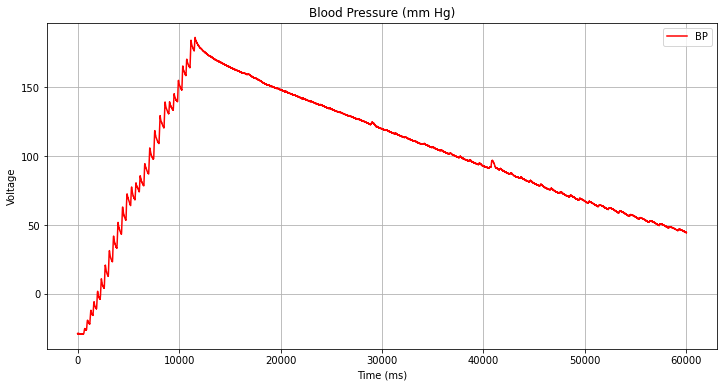

In [124]:
plt.figure(figsize=(12, 6))
plt.plot(data_subset['blood_pressure'], label='BP', color='red')
plt.title('Blood Pressure (mm Hg)')
plt.xlabel('Time (ms)')
plt.ylabel('Voltage')
plt.legend(loc='best')
plt.grid()
plt.show()

In [125]:
data_subset.shape

(60000, 2)

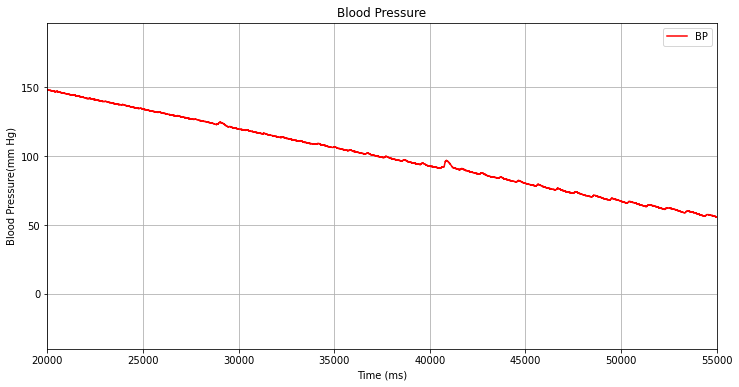

In [126]:
plt.figure(figsize=(12, 6))
plt.plot(data_subset['blood_pressure'], label='BP', color='red')
plt.title('Blood Pressure')
plt.xlabel('Time (ms)')
plt.ylabel('Blood Pressure(mm Hg)')
plt.xlim(20000,55000)
plt.legend(loc='best')
plt.grid()
plt.show()

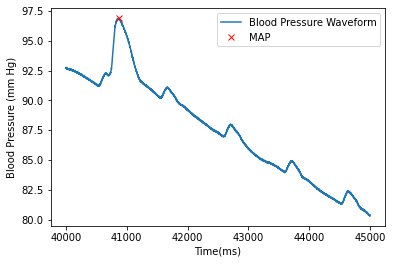

Mean Arterial Pressure: 96.89232192 mm Hg


In [127]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks, peak_widths

# Extract blood pressure values from the specified range
subset_start = 40000
subset_end = 45000
subset_data = data_subset.iloc[subset_start:subset_end]
blood_pressure_values = subset_data['blood_pressure'].values

# Find peaks in the blood pressure waveform
peaks, _ = find_peaks(blood_pressure_values, height=95)

# Calculate peak widths
widths, _, _, _ = peak_widths(blood_pressure_values, peaks)

# Identify the major peak based on width (assumption: systolic peak is wider)
major_peaks = peaks[widths > np.mean(widths)]

# Plot the blood pressure waveform with detected major peak
plt.plot(subset_data.index, blood_pressure_values, label='Blood Pressure Waveform')
plt.plot(subset_data.index[major_peaks], blood_pressure_values[major_peaks], 'rx', label='MAP')
plt.xlabel('Time(ms)')
plt.ylabel('Blood Pressure (mm Hg)')
plt.legend()
plt.show()

# Extract MAP from the major peak
map = np.max(blood_pressure_values[major_peaks])

print(f'Mean Arterial Pressure: {map} mm Hg')


In [128]:
map_values = map

# Assume a fraction for Pulse Pressure (you can adjust this based on your assumptions)
fraction = 1/3
pulse_pressure = map_values * fraction

# Calculate Systolic and Diastolic Blood Pressure
systolic_pressure = map_values + pulse_pressure / 2
diastolic_pressure = map_values - pulse_pressure / 2

print(f'MAP: {map_values} mm Hg')
print(f'Systolic Blood Pressure: {systolic_pressure} mm Hg')
print(f'Diastolic Blood Pressure: {diastolic_pressure} mm Hg')


MAP: 96.89232192 mm Hg
Systolic Blood Pressure: 113.04104224 mm Hg
Diastolic Blood Pressure: 80.7436016 mm Hg
